In [1]:
#!pip install fbprophet

In [2]:
#pip install bayesian-optimization

In [5]:
 !pip install pystan==2.19
 !pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.0.0-cp38-cp38-linux_x86_64.whl size=61788345 sha256=95fdefb12a9c9c727f84c6a119a0afd0bd240b266a1eeaa7017bb025b5fd24cc
  Stored in directory: /root/.cache/pip/wheels/92/af/46/7a021b32f4f0dec5d0a7b669e13b95a40a62ce007ac1039442
Successfully built pystan
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9086873 sha256=0c5142fd4ad11bd

In [4]:
from fbprophet import Prophet

ModuleNotFoundError: ignored

In [ ]:
import pandas as pd 
import numpy as np
import random as rd
import datetime
import warnings
import matplotlib.pyplot as plt 
import seaborn as sns 
import  statsmodels.tsa.api as smt
import statsmodels.api as sn 
from statsmodels.tsa.stattools import adfuller

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Science Bootcamp 20/Week 10/Python/google-data.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [ ]:
df['date']=pd.to_datetime(df["Date"]).dt.strftime("%d/%m/%y")
df.drop(columns=['Date'],inplace=True)

In [ ]:
data = pd.DataFrame()         #lag problemine gore
data["date"] = pd.date_range(start='2013-01-02', end='2017-12-29')
data["date"]=data["date"].dt.strftime("%d/%m/%y")
data =  data.merge(df, how="left", on="date")

In [ ]:
data.head()

,date,Open,High,Low,Close,Adj Close,Volume
0,02/01/13,357.385559,361.151062,355.959839,359.288177,359.288177,5115500.0
1,03/01/13,360.122742,363.600128,358.031342,359.496826,359.496826,4666500.0
2,04/01/13,362.313507,368.339294,361.488861,366.600616,366.600616,5562800.0
3,05/01/13,NaN,NaN,NaN,NaN,NaN,NaN
4,06/01/13,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
numeric_columns = ['Open','High', 'Low', 'Close', 'Adj Close', 'Volume']
for n_col in numeric_columns:
  data[n_col] = data[n_col].interpolate(method='cubic')

In [ ]:
data.head()

,date,Open,High,Low,Close,Adj Close,Volume
0,02/01/13,357.385559,361.151062,355.959839,359.288177,359.288177,5.115500e+06
1,03/01/13,360.122742,363.600128,358.031342,359.496826,359.496826,4.666500e+06
2,04/01/13,362.313507,368.339294,361.488861,366.600616,366.600616,5.562800e+06
3,05/01/13,363.672264,370.177059,364.091857,369.244832,369.244832,5.329146e+06
4,06/01/13,364.524566,369.314551,364.813292,367.666599,367.666599,4.257799e+06


In [ ]:
 a = sn.tsa.seasonal_decompose(data.Close.values, freq=365, model="additive")

<ipython-input-16-2738f43ac018>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  a = sn.tsa.seasonal_decompose(data.Close.values, freq=365, model="additive")


In [ ]:
 m = sn.tsa.seasonal_decompose(data.Close.values, freq=365, model="multiplative")

<ipython-input-17-6fa4c821396b>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  m = sn.tsa.seasonal_decompose(data.Close.values, freq=365, model="multiplative")


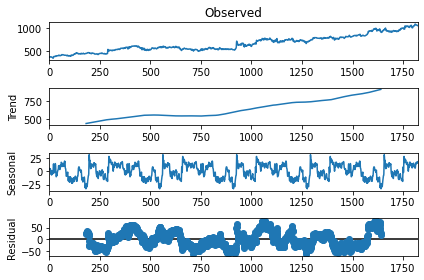

In [ ]:
fig=a.plot()

In [ ]:
def st_check(timeseries):
  dftest=adfuller(timeseries, autolag='AIC')
  dfoutput=pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of observations used'])
  for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
  print(dfoutput) 

st_check(data.Close)   

Test Statistic                   -0.232731
p-value                           0.934506
#Lags Used                        5.000000
Number of observations used    1817.000000
Critical Value (1%)              -3.433954
Critical Value (5%)              -2.863132
Critical Value (10%)             -2.567618
dtype: float64


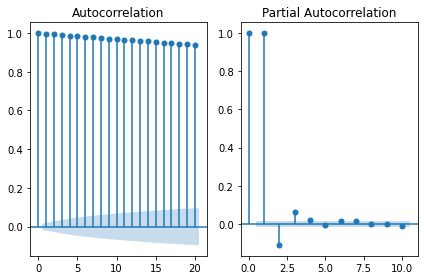

In [ ]:
l=(1,2)
a=plt.subplot2grid(l,(0,0))
p=plt.subplot2grid(l,(0,1))
smt.graphics.plot_acf(data.Close, lags=20, ax=a, alpha=0.5)
smt.graphics.plot_pacf(data.Close, lags=10, ax=p, alpha=0.5)
plt.tight_layout()

In [ ]:
model_df = data.loc[:, ['date', 'Close']].rename(columns={"date":"ds", "Close":"y"})
model_df.head()

,ds,y
0,02/01/13,359.288177
1,03/01/13,359.496826
2,04/01/13,366.600616
3,05/01/13,369.244832
4,06/01/13,367.666599


In [ ]:
model = Prophet(yearly_seasonality=True, interval_width=0.95)
model.fit(model_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
ft = model.make_future_dataframe(periods=100)
pred=model.predict(ft)
pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1918,2018-04-04,1082.079579,985.914701,1171.848112
1919,2018-04-05,1083.438518,983.456719,1169.800639
1920,2018-04-06,1081.551876,996.875810,1175.823455
1921,2018-04-07,1081.277932,980.740127,1182.568163
1922,2018-04-08,1081.364793,990.545881,1171.064021


Text(0.5, 1.0, 'Google stock Prices')

<Figure size 1152x576 with 0 Axes>

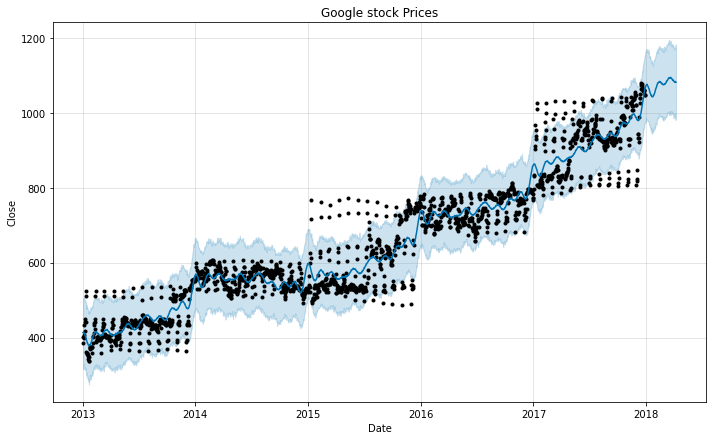

In [ ]:
plt.figure(figsize=(16,8))
model.plot(pred,xlabel="Date", ylabel="Close")
plt.title("Google stock Prices") 

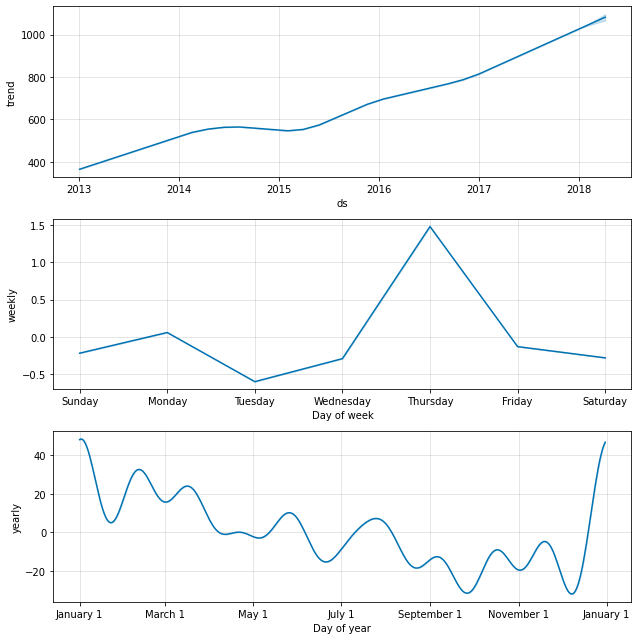

In [ ]:
 fig = model.plot_components(pred)

In [ ]:
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
def optimization_function (changepoint_prior_scale,seasonality_prior_scale):
  model=Prophet(changepoint_prior_scale=changepoint_prior_scale,seasonality_prior_scale=seasonality_prior_scale).fit(model_df)
  cross_val=cross_validation(model,horizon='300 days', parallel="processes")
  perf_m=performance_metrics(cross_val,rolling_window=1)
  rmse=(perf_m['rmse'].values[0])
  print(rmse)
  return rmse

In [ ]:
from bayes_opt import BayesianOptimization
parameters={'changepoint_prior_scale': [0.001, 0.5],
            'seasonality_prior_scale': [0.01, 10],
}

optimizer =BayesianOptimization(
    f=optimization_function,
    pbounds=parameters,
    random_state=42,)

In [ ]:
optimizer.maximize(init_points=2, n_iter=3,)

|   iter    |  target   | change... | season... |
-------------------------------------------------


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 5 forecasts with cutoffs between 2015-07-13 00:00:00 and 2017-03-04 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f2773740550>


86.10003721468915
| 1         | 86.1      | 0.1879    | 9.508     |


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 5 forecasts with cutoffs between 2015-07-13 00:00:00 and 2017-03-04 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f276d4e47f0>


89.41207622454178
| 2         | 89.41     | 0.1002    | 0.06517   |


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 5 forecasts with cutoffs between 2015-07-13 00:00:00 and 2017-03-04 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f276d4d7a60>


86.9394471767065
| 3         | 86.94     | 0.1603    | 0.1366    |


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 5 forecasts with cutoffs between 2015-07-13 00:00:00 and 2017-03-04 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f276d4a2940>


92.63188624501932
| 4         | 92.63     | 0.05158   | 5.221     |


In [ ]:
optimizer.max

{'target': 92.63188624501932,
 'params': {'changepoint_prior_scale': 0.05157770144835909,
  'seasonality_prior_scale': 5.221455753189935}}

In [ ]:
optimizer.res

[{'target': 86.10003721468915,
  'params': {'changepoint_prior_scale': 0.1878955193048339,
   'seasonality_prior_scale': 9.507635921035062}},
 {'target': 89.41207622454178,
  'params': {'changepoint_prior_scale': 0.10015912508555203,
   'seasonality_prior_scale': 0.06516595006478797}},
 {'target': 86.9394471767065,
  'params': {'changepoint_prior_scale': 0.16025807548856688,
   'seasonality_prior_scale': 0.13663741140932203}},
 {'target': 92.63188624501932,
  'params': {'changepoint_prior_scale': 0.05157770144835909,
   'seasonality_prior_scale': 5.221455753189935}}]